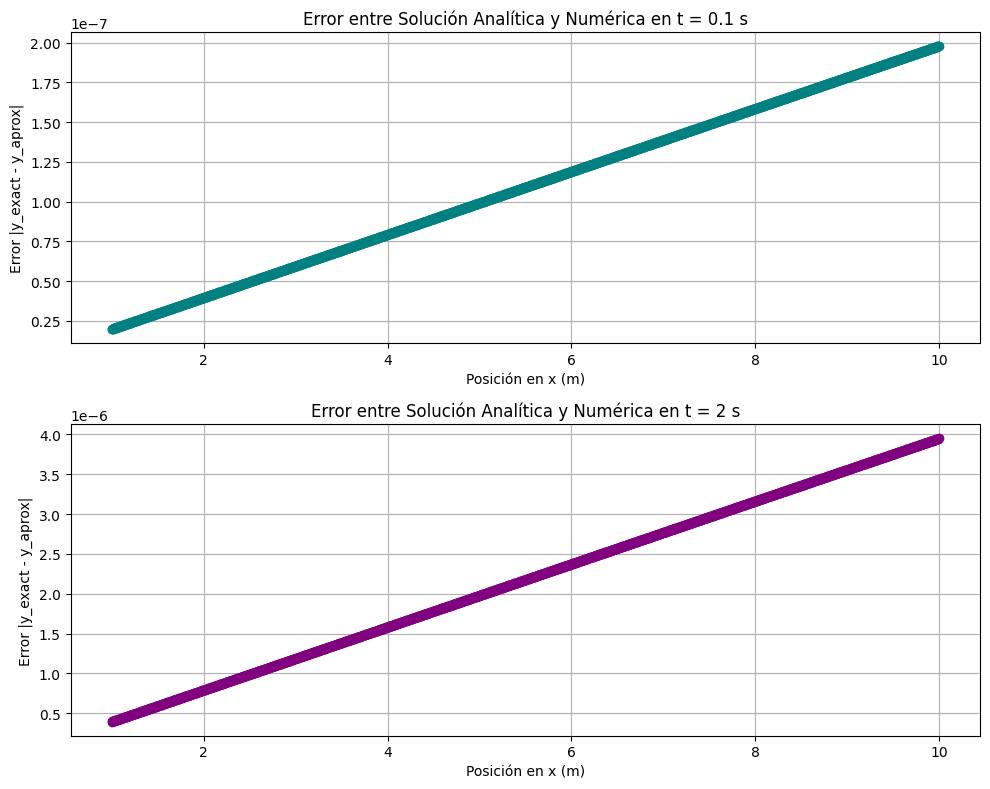

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros (asegúrate de que estos coincidan con tu simulación)
L = 250  # Longitud de la onda
v = 4    # Rapidez de la onda
T = 2    # Tiempo máximo
dx = 0.005  # Paso espacial
dt = dx / v  # Paso temporal
nx = int(L / dx) + 1  # Número de pasos en espacio
nt = int(T / dt) + 1  # Número de pasos en el tiempo

# Grillas de espacio y tiempo
x = np.linspace(0, L, nx)
t = np.linspace(0, T, nt)

# Condiciones iniciales
y = np.zeros((nx, nt))
y[:, 0] = 10 * np.sin(np.pi * x / L)  # Desplazamiento inicial
y[:, 1] = y[:, 0].copy()  # Primer paso en el tiempo con v = 0

# Diferencias finitas
for n in range(1, nt - 1):
    for i in range(1, nx - 1):
        y[i, n + 1] = 2 * (1 - (v * dt / dx) ** 2) * y[i, n] \
                      - y[i, n - 1] \
                      + (v * dt / dx) ** 2 * (y[i + 1, n] + y[i - 1, n])

# Solución analítica
y_exact = np.zeros((nx, nt))
for n in range(nt):
    y_exact[:, n] = 10 * np.sin(np.pi * x / L) * np.cos(2 * np.pi * t[n] / 125)

# Cálculo del error
error = np.abs(y - y_exact)

# Encontrar las posiciones
x_start = np.where(x >= 1)[0][0]
x_end = np.where(x <= 10)[0][-1]

# Graficar error en tiempos distintos (subplots)
plt.figure(figsize=(10, 8))

# Error en t = 0.1 s
plt.subplot(2, 1, 1)
plt.plot(x[x_start:x_end], error[x_start:x_end, round(0.1 / dt)], 'o-', color='teal', markersize=6, label='Error en t = 0.1 s')
plt.xlabel('Posición en x (m)')
plt.ylabel('Error |y_exact - y_aprox|')
plt.title('Error entre Solución Analítica y Numérica en t = 0.1 s')
plt.grid(True)
plt.tight_layout()

# Error en t = 2 s
plt.subplot(2, 1, 2)
plt.plot(x[x_start:x_end], error[x_start:x_end, round(2 / dt)], 'o-', color='purple', markersize=6, label='Error en t = 2 s')
plt.xlabel('Posición en x (m)')
plt.ylabel('Error |y_exact - y_aprox|')
plt.title('Error entre Solución Analítica y Numérica en t = 2 s')
plt.grid(True)
plt.tight_layout()

plt.show()
